In [1]:
import pandas as pd
import seaborn as sns
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import  WordNetLemmatizer

In [2]:
df = pd.read_csv('F-train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
count_vectorizer = CountVectorizer(stop_words='english')

doc_word = count_vectorizer.fit_transform(df.text)
pd.DataFrame(doc_word.toarray(), columns=count_vectorizer.get_feature_names())

,00,000,0000,000035,0001,00012,0002,000202,000205,0002062,...,集体安全条约组织,集体安全条约组织与联合国专门机构,集体安全条约组织是多层面结构,集体安全条约组织正在积极促进帮助阿富汗进行冲突后重建以及消除来自该国的毒品威胁的国际努力,集体安全条约组织秘书长博尔久扎,集体提出创新办法,非法贩运毒品以及确保国际信息安全,预防和解决冲突,ﬁnds,ｓꮭ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
max(df.text.str.len())

142961

In [12]:
df ['text'] = df['text'] + df['title']

In [13]:
max(df.text.str.len())

143034

In [14]:
df["text"]

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 18285, dtype: object

In [15]:
def clean_text(text):
    
  
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

def keep_english(text):
    
    
    text = re.sub("[^a-zA-Z]+", " ", text)
    return text
df['text'] = df['text'].apply(lambda x: keep_english(x))

# clean text data
df['text'] = df['text'].apply(lambda x: clean_text(x))

In [16]:
df['text']

0        house dem aide even see comey letter jason cha...
1        ever get feeling life circles roundabout rathe...
2        truth might get fired october tension intellig...
3        videos civilians killed single us airstrike id...
4        print iranian woman sentenced six years prison...
                               ...                        
20795    rapper unloaded black celebrities met donald t...
20796    green bay packers lost washington redskins wee...
20797    macy today grew union several great names amer...
20798    nato russia hold parallel exercises balkans pr...
20799    david swanson author activist journalist radio...
Name: text, Length: 18285, dtype: object

In [17]:
lemmy = WordNetLemmatizer()
def apply_lem(text):
    text_split = text.split(' ')
    lem_v_text = ''
    for text in text_split:
        lem_v_text += lemmy.lemmatize(text, pos='v') + ' '
        text_split = lem_v_text.split(' ')
        lem_text =''
    for text in text_split:
        lem_text += lemmy.lemmatize(text, pos='a') + ' '
    return lem_text
df['text'] = df['text'].apply(apply_lem)
df["text"]


0        house dem aide even see comey letter jason cha...
1        ever get feel life circle roundabout rather he...
2        truth might get fire october tension intellige...
3        videos civilians kill single us airstrike iden...
4        print iranian woman sentence six years prison ...
                               ...                        
20795    rapper unload black celebrities meet donald tr...
20796    green bay packers lose washington redskins wee...
20797    macy today grow union several great name ameri...
20798    nato russia hold parallel exercise balkans pre...
20799    david swanson author activist journalist radio...
Name: text, Length: 18285, dtype: object

In [18]:
count_vectorizer = CountVectorizer(stop_words='english')

doc_word = count_vectorizer.fit_transform(df.text)
pd.DataFrame(doc_word.toarray(), columns=count_vectorizer.get_feature_names())

,aa,aaa,aaaaah,aaaaggg,aaaahhh,aaah,aaahhh,aaajiao,aaany,aaas,...,zygankow,zylinderkopfdichtung,zynga,zytiga,zytsov,zyuganov,zyzs,zz,zzz,zzzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Classify label

In [19]:
def classify_label(label):
   
    if (label == 1 ):
        return 'positive'
    else:
        return 'negative'

In [20]:
df.label.apply(classify_label)

0        positive
1        negative
2        positive
3        positive
4        positive
           ...   
20795    negative
20796    negative
20797    negative
20798    positive
20799    positive
Name: label, Length: 18285, dtype: object

In [21]:
df.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

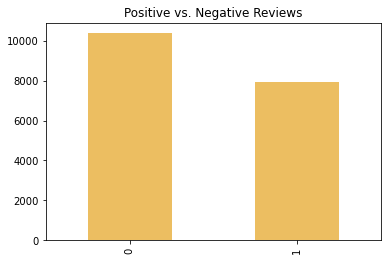

In [22]:
import matplotlib.pyplot as plt

df.label.value_counts().plot(kind='bar', color ='#ECBE61' );
plt.title('Positive vs. Negative Reviews');

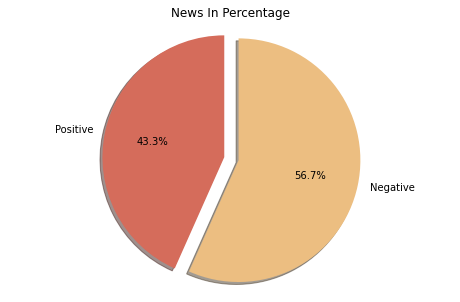

In [23]:
plt.figure(figsize=(8,5))
labels= ['Positive', 'Negative']
colors=['#D56C5B', '#ECBE81']
sizes= [7924, 10361]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',shadow=True, explode=[0.1,0.02])
plt.axis('equal')
plt.title("News In Percentage")
plt.show()

As indicated, Negative news are higher than Positive news. Negative news are represent 56.7% from the data.


# Split data to Positive and Negative 

In [24]:
positive=(df['text'][df['label'] == 1]) 
negative=(df['text'][df['label'] == 0]) 
negative

1        ever get feel life circle roundabout rather he...
5        try time jackie mason voice reason week exclus...
7        paris france choose idealistic traditional can...
9        week michael flynn resign national security ad...
10       organize action activist group morph barack ob...
                               ...                        
20792    two suicide bombers attack bus station jakarta...
20794    donald trump take twitter friday praise vladim...
20795    rapper unload black celebrities meet donald tr...
20796    green bay packers lose washington redskins wee...
20797    macy today grow union several great name ameri...
Name: text, Length: 10361, dtype: object

In [25]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide even see comey letter jason cha...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get feel life circle roundabout rather he...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth might get fire october tension intellige...,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos civilians kill single us airstrike iden...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentence six years prison ...,1


# POSITIVE News

## Remove Meaningless words

In [26]:
post_text = " ".join(positive.values)
post_text=word_tokenize(post_text)

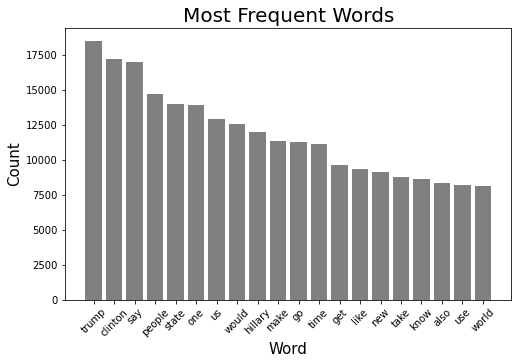

In [27]:
from nltk import FreqDist

fre=FreqDist(post_text)
fre.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre.most_common(20):
    plt.bar(k,v, color='#808080')

In [28]:
stop_words = stopwords.words("english")
for word in ["trump","clinton","people","say","state","one","us","would","make","get","like","even","come","obama"
             ,"go","also","use","hillary","see","president"]:
    stop_words.append(word)

In [29]:
post_text_no_stop = [word for word in post_text if word not in stop_words]

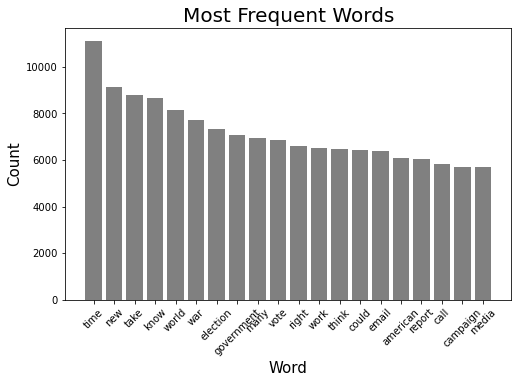

In [30]:
fre_2=FreqDist(post_text_no_stop)
fre_2.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_2.most_common(20):
    plt.bar(k,v, color='#808080')

In [31]:
for word in ["time","many","think","email","first","two","find","need","good","de","years","american",
            "could","work"]:
    stop_words.append(word)

In [32]:
post_text_no_stop_2 = [word for word in post_text_no_stop if word not in stop_words]

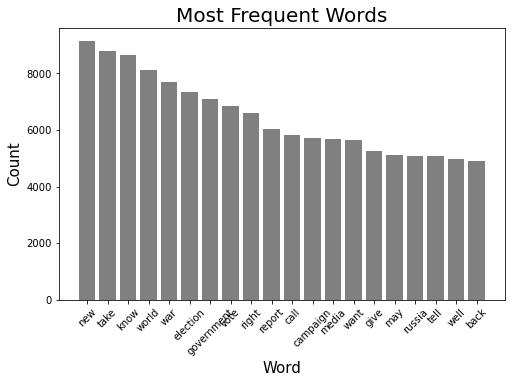

In [33]:
fre_3=FreqDist(post_text_no_stop_2)
fre_3.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_3.most_common(20):
    plt.bar(k,v, color='#808080')

In [34]:
for word in ["year","show","donald","america","way","live","back","well","take","news"]:
    stop_words.append(word)

In [35]:
post_text_no_stop_3 = [word for word in post_text_no_stop_2 if word not in stop_words]

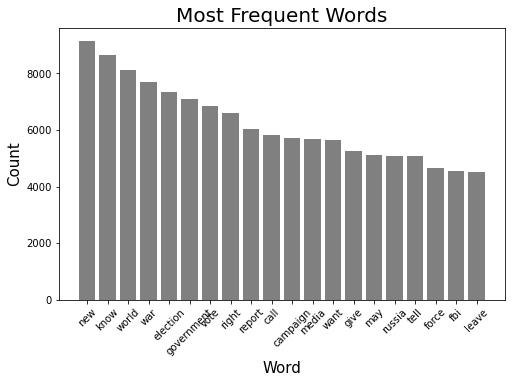

In [36]:
fre_4=FreqDist(post_text_no_stop_3)
fre_4.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_4.most_common(20):
    plt.bar(k,v, color='#808080')

In [37]:
for word in ["white","power","long","support","look","day","last","party","unite","much"]:
    stop_words.append(word)

In [38]:
post_text_no_stop_4 = [word for word in post_text_no_stop_3 if word not in stop_words]

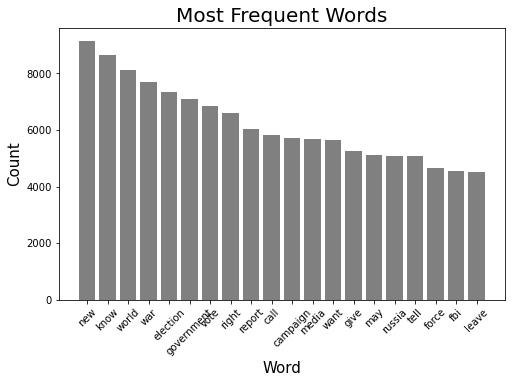

In [39]:
fre_5=FreqDist(post_text_no_stop_4)
fre_5.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_5.most_common(20):
    plt.bar(k,v, color='#808080')

In [40]:
for word in ["com","another","end","write","since","point","leave","help","mean","house","become",
            "tell","give","want","try","never","great","high","follow","la","que", "en", "el", "los", "del",
             "se", "por", "las", "una", "para", "al", "su", "es", "lo", "como", "le", "est", "org", "ha", "os"
             , "banchero", "sin", "les", "article", "fue", "voltairenet", "sus", "et", "ya", "pol"  "http", 
             "html", "widget", "medium", "wellness", "infowarsstore","ims", "tzrwu", "flip", "wp", 
             "neural", "upload", "supercharge", "jpg", "brainforce", "switch", "alex"]:
    stop_words.append(word)

In [41]:
post_text_no_stop_5 = [word for word in post_text_no_stop_4 if word not in stop_words]

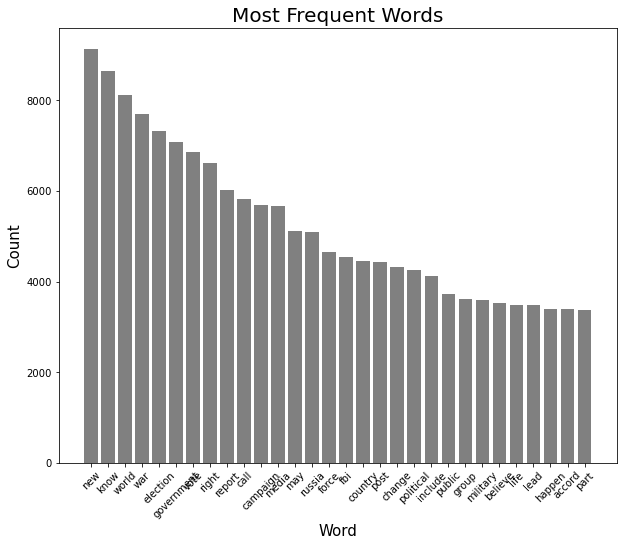

In [42]:
fre_6=FreqDist(post_text_no_stop_5)
fre_6.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_6.most_common(30):
    plt.bar(k,v, color='#808080')

# Drop New Stop Words

In [43]:
positive

0        house dem aide even see comey letter jason cha...
2        truth might get fire october tension intellige...
3        videos civilians kill single us airstrike iden...
4        print iranian woman sentence six years prison ...
12       mystery surround third reich nazi germany stil...
                               ...                        
20788    google pinterest digg linkedin reddit stumbleu...
20791    lawyer keep hillary campaign chief jail doj hi...
20793    share although vandal think cool destroy donal...
20798    nato russia hold parallel exercise balkans pre...
20799    david swanson author activist journalist radio...
Name: text, Length: 7924, dtype: object

In [44]:
from nltk.tokenize.treebank import TreebankWordDetokenizer


def remove_stop(text):
    """
    This method will be called to remove the new added stop-words from the text.
    """
    word= word_tokenize(text)
    word = [x for x in word if x not in stop_words]
    return word

positive=positive.apply(lambda x: remove_stop(x))
positive

0        [dem, aide, comey, letter, jason, chaffetz, tw...
2        [truth, might, fire, october, tension, intelli...
3        [videos, civilians, kill, single, airstrike, i...
4        [print, iranian, woman, sentence, six, prison,...
12       [mystery, surround, third, reich, nazi, german...
                               ...                        
20788    [google, pinterest, digg, linkedin, reddit, st...
20791    [lawyer, keep, campaign, chief, jail, doj, pro...
20793    [share, although, vandal, cool, destroy, holly...
20798    [nato, russia, hold, parallel, exercise, balka...
20799    [david, swanson, author, activist, journalist,...
Name: text, Length: 7924, dtype: object

In [45]:
def untoken(text):
    """
    This method will be called to untoken the text.
    """
    text= TreebankWordDetokenizer().detokenize(text)
    return text
positive=positive.apply(lambda x: untoken(x))

In [46]:
positive

0        dem aide comey letter jason chaffetz tweet dar...
2        truth might fire october tension intelligence ...
3        videos civilians kill single airstrike identif...
4        print iranian woman sentence six prison iran r...
12       mystery surround third reich nazi germany stil...
                               ...                        
20788    google pinterest digg linkedin reddit stumbleu...
20791    lawyer keep campaign chief jail doj probe nove...
20793    share although vandal cool destroy hollywood s...
20798    nato russia hold parallel exercise balkans pre...
20799    david swanson author activist journalist radio...
Name: text, Length: 7924, dtype: object

# Drop Wrong Words


In [47]:
def remove_dup(text):
    """
    This method will be called to remove the words with repeated letters, which makes the word meaningless.
    """
    text= word_tokenize(text)
    for idx, word in enumerate(text):
        count=0
        lis =[]
        for i in range(len(word)):
            if i >0:
                if word[i] == word[i-1]:
                    if word[i] not in lis:
                          lis.append(word[i])
                    count+=1
        if (len(lis)>1) & (count >3):
            print(text[idx])
            text.pop(idx)
        elif (count > 1) & (len(lis)==1):
            print(text[idx])
            text.pop(idx)  
    return text 

In [48]:
positive=positive.apply(lambda x: remove_dup(x))

assessments
assessments
assessment
assessments
possess
granddaddy
iii
iii
viii
possession
possession
www
godlessness
illegally
illegally
illegally
assassinate
www
www
www
www
www
www
otjuoqpppg
www
assess
assess
assessment
possess
carelessness
assess
illegally
assessment
www
kkk
voodoo
illegally
assessment
assessment
possession
hmmm
xxx
iii
iii
www
www
assessment
assassination
assess
www
www
illegally
www
www
www
www
www
www
skillfully
assessments
eeepam
illegally
assassination
www
assassination
homelessness
assassinate
www
www
assessment
assessment
assess
helplessness
possession
possession
assess
assessment
possession
assessment
possession
possess
assassination
viii
viii
iii
www
www
www
assess
possession
www
mmmm
www
jeeeez
www
www
assassinate
assassination
viii
assess
viii
voodoo
possessions
www
www
iii
possess
dispossess
assess
www
www
littlegreenfootballs
illegally
www
www
www
www
www
www
www
www
www
www
www
www
www
www
www
www
www
www
possession
assessments
reassess
assessment
ass

assessment
iii
iii
ifttt
lawlessness
lawlessness
intellectually
intellectually
intellectually
intellectually
possess
www
www
possess
iii
iii
assassinate
iii
possession
possession
illegally
possess
assassinate
littlespottedhorse
www
ohhhh
possess
assassinate
assassination
assassination
ruthlessness
www
possess
homelessness
possess
cookbook
sarkaaaron
lawlessness
presssec
presssec
assassination
assassination
dispossession
www
www
reassess
iii
possess
www
www
illegally
assess
assess
assess
assess
assess
assessment
helplessness
crisscross
crisscross
illegally
fearlessness
possess
willfully
www
possession
assessment
illegally
assassination
kkk
kkk
kkk
hmmmm
chilller
zaboomafoo
assassination
assassination
assassination
assassinations
assassin
assassination
assassination
assassinations
assassin
assassination
assassination
assassin
assassin
assessment
www
fussiness
illegally
assess
assess
www
assessment
www
iii
assassinations
iii
nooo
possess
carelessness
assassinate
assassination
www
www
www


possess
possession
assess
www
www
lawlessness
lawlessness
www
assessments
www
www
illegally
iii
dismissiveness
illegally
www
www
www
cccep
cccep
cccep
cccep
cccep
cccep
cccep
possess
woooo
assessment
assessments
assessments
assessments
possess
possess
kkk
hmmm
www
iii
www
gayyysrkaekmap
prpyyye
acccgwmfcwkibwmffqojcasffgidaqachgecf
xydjwww
www
assess
assassinate
lehhhj
illegally
illegally
possessions
possess
freewheel
skillfully
kkk
kkk
assess
assess
assess
www
possession
www
www
iii
carelessness
www
assassinate
assassination
assassinations
assassinations
assassinations
hopelessness
assessment
assessment
iii
www
assess
possession
commentscomment
possession
possess
www
allenfalls
www
possess
powerlessness
assess
assess
www
www
www
www
assassination
www
assassination
assassinations
illegally
www
assess
xviiie
xviiie
reassess
alll
www
www
assassination
possess
possess
willfully
hufflepuff
possess
possess
possess
assessment
iii
assessment
lawlessness
www
www
www
lawlessness
lawlessness
mis

possession
illegally
iii
assess
iii
assessment
www
possession
powerlessness
www
www
dispossess
dispossess
dispossess
www
assassinations
assassination
assassinations
assassination
assassination
www
www
www
iii
assessment
assess
www
www
www
www
www
www
www
www
www
www
www
www
www
www
www
www
www
www
possession
assessment
assess
assassination
iii
possess
assess
possession
possession
possession
possession
possession
possession
possession
possession
possession
possession
possession
possession
possession
possession
possession
possession
possession
possession
dispossess
possessions
illegally
www
teepees
possess
assassination
assassination
assassination
assassination
assassinate
assassins
assassination
possess
illegally
illegally
illegally
www
assess
iii
assassinate
possess
assassinate
possession
www
repossessions
willliam
www
intellectually
kkk
possessions
possessions
voodoo
assassinate
www
possession
crisscross
assess
assessments
www
xbfyqooo
www
www
www
www
www
www
assassination
assassinati

In [49]:
positive

0        [dem, aide, comey, letter, jason, chaffetz, tw...
2        [truth, might, fire, october, tension, intelli...
3        [videos, civilians, kill, single, airstrike, i...
4        [print, iranian, woman, sentence, six, prison,...
12       [mystery, surround, third, reich, nazi, german...
                               ...                        
20788    [google, pinterest, digg, linkedin, reddit, st...
20791    [lawyer, keep, campaign, chief, jail, doj, pro...
20793    [share, although, vandal, cool, destroy, holly...
20798    [nato, russia, hold, parallel, exercise, balka...
20799    [david, swanson, author, activist, journalist,...
Name: text, Length: 7924, dtype: object

# NEGATIVE News

In [50]:
neg_text = " ".join(negative.values)
neg_text=word_tokenize(neg_text)

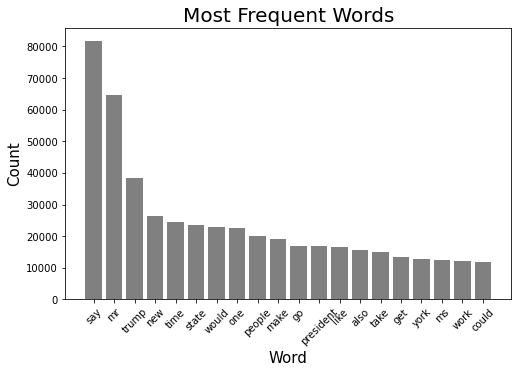

In [51]:
from nltk import FreqDist

fre=FreqDist(neg_text)
fre.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre.most_common(20):
    plt.bar(k,v, color='#808080')

In [52]:
for word in ["like","go","make","people","one","state","also","get","ms","even","years","two","come","many",
             "first","use","time","trump"]:
    stop_words.append(word)

In [53]:
neg_text_no_stop = [word for word in neg_text if word not in stop_words]

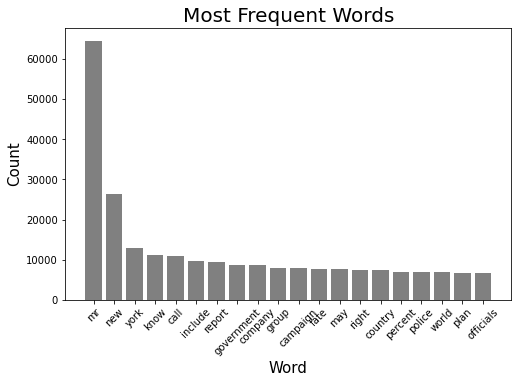

In [54]:
fre_2=FreqDist(neg_text_no_stop)
fre_2.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_2.most_common(20):
    plt.bar(k,v, color='#808080')

In [55]:
for word in ["mr","want","good","national","world","help","city","become","york"]:
    stop_words.append(word)

In [56]:
neg_text_no_stop_2 = [word for word in neg_text_no_stop if word not in stop_words]

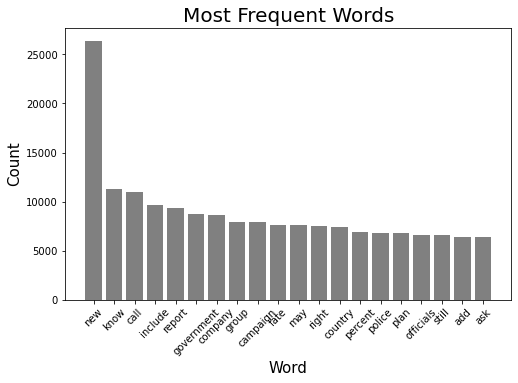

In [57]:
fre_3=FreqDist(neg_text_no_stop_2)
fre_3.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_3.most_common(20):
    plt.bar(k,v, color='#808080')

In [58]:
for word in ["meet","change","house","new","leave","late","percent","former"]:
    stop_words.append(word)

In [59]:
neg_text_no_stop_3 = [word for word in neg_text_no_stop_2 if word not in stop_words]

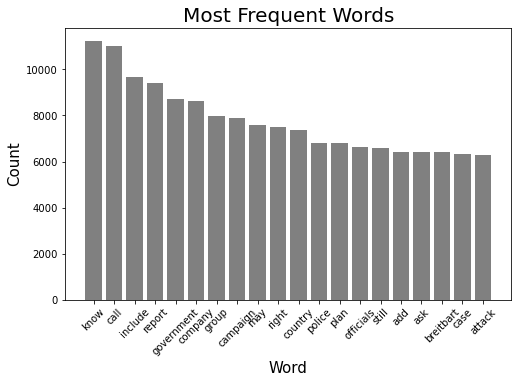

In [60]:
fre_4=FreqDist(neg_text_no_stop_3)
fre_4.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_4.most_common(20):
    plt.bar(k,v, color='#808080')

In [61]:
for word in ["court","home","million","school","support","company","could"]:
    stop_words.append(word)

In [62]:
neg_text_no_stop_4 = [word for word in neg_text_no_stop_3 if word not in stop_words]

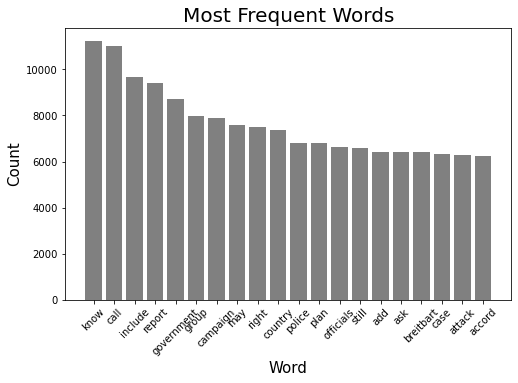

In [63]:
fre_5=FreqDist(neg_text_no_stop_4)
fre_5.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_5.most_common(20):
    plt.bar(k,v, color='#808080')

In [64]:
for word in["week","three","around","run","place","play","start","move","know","begin","big","early",
           "family","mrs","hold","never","team","job","turn","keep","order","man",
           "la","que", "en", "el", "los", "del","se", "por", "las", "una", "para", "al", "su", "es", "lo", 
            "como", "le", "est", "org", "ha", "os", "banchero", "sin", "les", "article", "fue", "voltairenet",
            "sus", "et", "ya", "pol"  "http", "html", "widget", "medium", "wellness", "infowarsstore","ims",
            "tzrwu", "flip", "wp","neural", "upload", "supercharge", "jpg", "brainforce", "switch", "alex"]:
    stop_words.append(word)

In [65]:
neg_text_no_stop_5 = [word for word in neg_text_no_stop_4 if word not in stop_words]

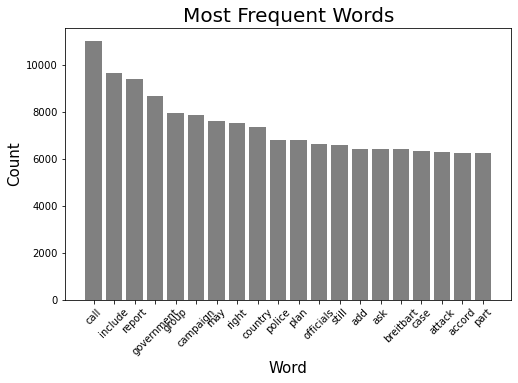

In [66]:
fre_6=FreqDist(neg_text_no_stop_5)
fre_6.most_common()
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_6.most_common(20):
    plt.bar(k,v, color='#808080')

# Drop New Stop Words

In [67]:
negative

1        ever get feel life circle roundabout rather he...
5        try time jackie mason voice reason week exclus...
7        paris france choose idealistic traditional can...
9        week michael flynn resign national security ad...
10       organize action activist group morph barack ob...
                               ...                        
20792    two suicide bombers attack bus station jakarta...
20794    donald trump take twitter friday praise vladim...
20795    rapper unload black celebrities meet donald tr...
20796    green bay packers lose washington redskins wee...
20797    macy today grow union several great name ameri...
Name: text, Length: 10361, dtype: object

In [68]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

def remove_stop(text):
    """
    This method will be called to remove the new added stop-words from the text.
    """
    word= word_tokenize(text)
    word = [x for x in word if x not in stop_words]
    return word
def untoken(text):
    """
    This method will be called to untoken the text.
    """
    text= TreebankWordDetokenizer().detokenize(text)
    return text
negative=negative.apply(remove_stop)
negative=negative.apply(untoken)

In [69]:
negative

1        ever feel life circle roundabout rather head s...
5        jackie mason voice reason exclusive clip breit...
7        paris france choose idealistic traditional can...
9        michael flynn resign security adviser seal pro...
10       organize action activist group morph barack pr...
                               ...                        
20792    suicide bombers attack bus station jakarta wed...
20794    twitter friday praise vladimir putin decision ...
20795    rapper unload black celebrities election fail ...
20796    green bay packers lose washington redskins dro...
20797    macy today grow union several name retail incl...
Name: text, Length: 10361, dtype: object

# Drop Wrong Words

In [70]:
def remove_dup(text):
    """
    This method will be called to remove the words with repeated letters, which makes the word meaningless.
    """
    text= word_tokenize(text)
    for idx, word in enumerate(text):
        count=0
        lis =[]
        for i in range(len(word)):
            if i >0:
                if word[i] == word[i-1]:
                    if word[i] not in lis:
                          lis.append(word[i])
                    count+=1
        if (len(lis)>1) & (count >3):
            print(text[idx])
            text.pop(idx)
        elif (count > 1) & (len(lis)==1):
            print(text[idx])
            text.pop(idx)  
    return text 

In [71]:
negative=negative.apply(remove_dup)

assessments
joblessness
assassination
assessment
intellectually
assessment
assessment
illegally
possess
illegally
halliwell
assassinate
assassinate
assassinate
assassination
assassination
senselessness
skillfully
assessment
crassness
riffraff
assassination
illegally
assess
assess
assessment
assess
assessments
reassess
possess
iii
mindlessness
mindlessness
possessions
assessment
kkk
kkk
kkk
possessions
dispossess
cookbook
aaa
madddawg
lawlessness
illegally
aaa
possession
thoughtlessness
assess
assessments
illegally
illegally
assessments
relentlessness
presssec
lawlessness
lawlessness
lawlessness
assess
iii
possessions
homelessness
iii
assessment
assess
iii
possession
iii
aaa
assessment
crisscross
reassess
assess
assess
freewheel
willfully
laaaaar
illegally
illegally
ianhanchettmatthews
assess
assess
assessment
assassination
assassin
helplessness
illegally
illegally
homelessness
possess
iii
assessments
assessment
freewheel
possess
assess
assassination
possess
hillbilly
hillbilly
hillbill

hillbilly
hillbilly
hillbilly
homelessness
homelessness
homelessness
homelessness
possession
illegally
freewheel
willfully
aaa
possession
possession
assessment
assessment
assess
assessment
illegally
illegally
assessment
reassess
www
possess
assess
possess
possess
assess
reassess
hopelessness
assess
assess
reassess
assessment
orovillespillway
assessment
assessment
assess
assessment
illegally
assess
assassination
possessiveness
illegally
repossess
illegally
freewheel
illegally
assess
illegally
www
assassination
powerlessness
illegally
assassinate
lawlessness
illegally
possession
illegally
illegally
lawlessness
illegally
volleyball
illegally
illegally
crisscross
iii
aimlessness
possession
possess
possess
assessments
kkk
possession
intellectually
assessment
assess
assessment
illegally
iii
assess
illegally
illegally
assessment
possess
skillfully
breathlessness
powerlessness
senselessness
assess
possess
restlessness
iii
iii
amerikkka
illegally
assess
possess
crisscross
repossess
assess
asses

assessment
www
iii
illegally
assassinate
crisscross
assess
possess
possess
illegally
assess
assess
possession
nooo
assessment
assess
assessment
possess
razzmatazz
illegally
iii
illegally
iii
assassinate
assassinate
illegally
assess
assess
assess
assess
assess
assessment
assassination
assassination
assassination
assess
assessment
skillfully
assessment
maagaard
brittpettibone
possess
skillfully
schoolbooks
assassination
www
volleyball
iii
iii
illegally
lawlessness
mmm
mmm
assassinations
assess
assess
possess
assassination
assassination
assessment
assassinate
assassinate
assessment
kkk
kkk
kkk
assassinate
intellectually
selflessness
selflessness
assassination
possess
reassessment
willfully
assassination
assess
assessment
freewheel
possession
possession
possession
assessments
hmmm
assessments
assassinate
assess
voodoo
ruthlessness
assessment
assessments
assessment
assessments
iii
possess
assessments
assessments
possession
assassinations
assassinations
oooh
assessment
assessment
assess
asse

millwall
millwall
millwall
millwall
millwall
belleville
recklessness
assassination
schoolbook
shamelessness
assess
freewheel
possession
possess
cluelessness
assessment
assessment
illegally
iii
assessments
assess
hopelessness
lawlessness
possess
assessment
illegally
assessment
assassinate
assessments
assessment
assessment
possess
possession
assassinate
homelessness
homelessness
homelessness
assess
assess
poorbooker
iii
assess
possess
suuuuure
assassin
freewheelers
illegally
assessments
iii
possession
assessments
ruthlessness
assessment
illegally
wellesleycollege
assassin
assassin
illegally
iii
assess
assessments
assessment
assessment
illegally
illegally
illegally
illegally
illegally
possess
possess
yesss
willfully
willfully
iii
assess
possession
assessment
giftlessness
assassination
assassination
possessions
assassination
assassination
assess
freewheel
ianhanchetttrump
possession
possession
possession
assassination
illegally
iii
iii
possession
assassinate
iii
presssec
assess
assessment


In [72]:
negative

1        [ever, feel, life, circle, roundabout, rather,...
5        [jackie, mason, voice, reason, exclusive, clip...
7        [paris, france, choose, idealistic, traditiona...
9        [michael, flynn, resign, security, adviser, se...
10       [organize, action, activist, group, morph, bar...
                               ...                        
20792    [suicide, bombers, attack, bus, station, jakar...
20794    [twitter, friday, praise, vladimir, putin, dec...
20795    [rapper, unload, black, celebrities, election,...
20796    [green, bay, packers, lose, washington, redski...
20797    [macy, today, grow, union, several, name, reta...
Name: text, Length: 10361, dtype: object

In [73]:
negative=negative.apply(untoken)
positive=positive.apply(untoken)


In [74]:
negative

1        ever feel life circle roundabout rather head s...
5        jackie mason voice reason exclusive clip breit...
7        paris france choose idealistic traditional can...
9        michael flynn resign security adviser seal pro...
10       organize action activist group morph barack pr...
                               ...                        
20792    suicide bombers attack bus station jakarta wed...
20794    twitter friday praise vladimir putin decision ...
20795    rapper unload black celebrities election fail ...
20796    green bay packers lose washington redskins dro...
20797    macy today grow union several name retail incl...
Name: text, Length: 10361, dtype: object

# Save Data to CSV Files

In [76]:
positive.to_csv('/Users/User/Desktop/Project4/Positive.csv',index=True)
negative.to_csv('/Users/User/Desktop/Project4/Negative.csv',index=True)